# Homework 10: Problems
### ASTR-324, Spring 2017, Ivezic & Juric, University of Washington
https://github.com/uw-astr-324-s17/astr-324-s17


## Problem 1: Unsupervised classification using Gausian Mixture Model

GMM applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

For more details, including reading the data, see Homework 1 - this is the same data sample.  

Use the code from [astroML fig. 6.6](http://www.astroml.org/book_figures/chapter6/fig_EM_metallicity.html) 
to search for clusters in the 4-dimensional g-i vs. logP vs. u-g vs. A space. 

Hint: adapt the code we used in notebook for Week 10 (GMM for asteroids)

Assume that there are no more than 30 physical clusters. 

a) plot BIC (and AIC if you want) as a function of the assumed number of clusters; what is the optimal number of clusters?

b) plot logP vs. g-i diagram and overplot ellipses (1.5 sigma level as in fig. 6.6)
outlining each class for the best number of clusters. 

c) what fraction of sample belongs to the most populous cluster (hint: look at gmm\_best.weights_) 


## Problem 2: Your feedback! 

Please answer each question with a few words - you will help us a lot! 

Don't worry about being (too) critical - your critiques are actually the most 
useful feedback to us! 

You can add your text directly below, after each question. 

1) did you find power point slides, or jupyter notebook approach, easier to follow?

2) should we have spent more in-class time on analyzing notebook code line by line? 

3) should we have spent more or less in-class time on discussing theoretical background?

4) were there any topics that could be dropped, or minimized in coverage? 

5) can you think of any additional topics that should have been covered, or discussed
   in more detail? 
   
6) should we have covered more non-astronomical applications (e.g. text processing,
data harvesting from the web)? 
   
7) did you find homeworks useful learning experience?

8) were homeworks too easy, too hard, or just perfect? 

9) do you have any other advice on how to make this class more effective/relevant/interesting? 


   
   








<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture as GMM
from astroML.datasets import fetch_LINEAR_geneva
from astroML.decorators import pickle_results
from astroML.plotting.tools import draw_ellipse
import seaborn as sns

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [2]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [3]:
data = fetch_LINEAR_geneva()
# N.B. this is a 4-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']
X = np.vstack([data['gi'], data['logP'], data['ug'], data['amp']]).T

a) plot BIC (and AIC if you want) as a function of the assumed number of clusters; what is the optimal number of clusters?

In [4]:
# Compute GMM models & AIC/BIC
# No more than 30 clusters
N = np.arange(1, 30)

@pickle_results("GMM_LINEAR.pkl")
def compute_GMM(N, covariance_type='full', max_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        models[i] = GMM(n_components=N[i], max_iter=max_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

@pickle_results: using precomputed results from 'GMM_LINEAR.pkl'


best fit converged: True
BIC: n_components =  19


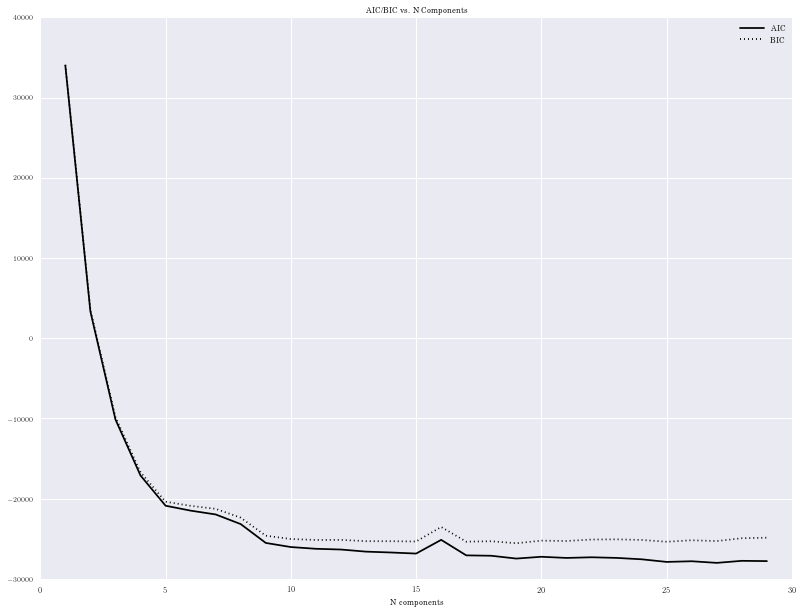

In [5]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.45, bottom=0.25, top=0.9, left=0.1, right=0.97)

# plot AIC/BIC
ax = fig.add_subplot(111)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, ':k', label='BIC')
ax.legend(loc=1)
ax.set_xlabel('N components')
ax.set_title('AIC/BIC vs. N Components')
plt.setp(ax.get_yticklabels(), fontsize=7)

i_best = np.argmin(BIC)
gmm_best = models[i_best]

print "best fit converged:", gmm_best.converged_
print "BIC: n_components =  %i" % N[i_best]

plt.grid(True)
plt.show()

The optimal number of clusters is 19.

b) plot logP vs. g-i diagram and overplot ellipses (1.5 sigma level as in fig. 6.6) outlining each class for the best number of clusters.

0 5 0.143243703707
1 18 0.0968222642716
2 10 0.0867780680801
3 3 0.0859225737307
4 9 0.0847430704715
5 13 0.0768208376343
6 7 0.0709358528425
7 14 0.0626085920305
8 4 0.0583668980747
9 16 0.0454947837711
10 15 0.0444770290831
11 2 0.0420723318326
12 0 0.0316766794691
13 11 0.0227757150685
14 8 0.0174506150708
15 6 0.0131799058528
16 12 0.0118258789782
17 17 0.00431707767453
18 1 0.000488122356004


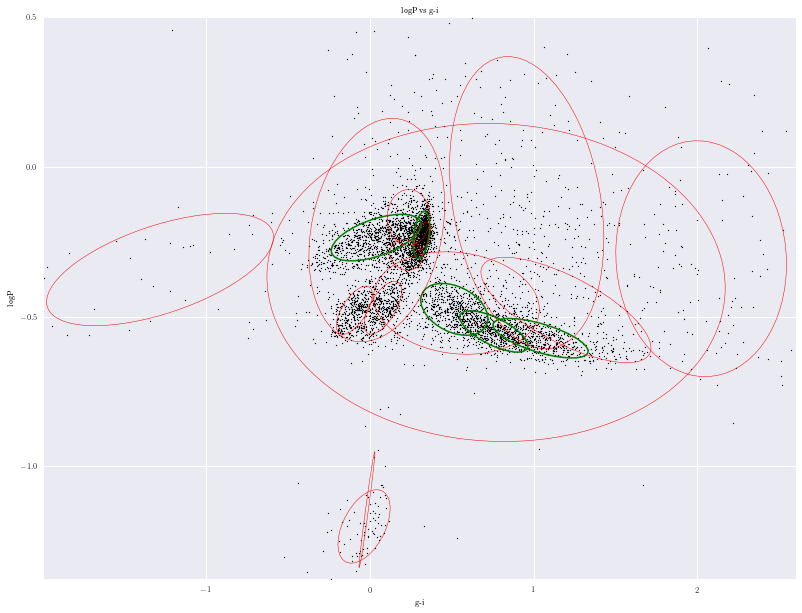

In [19]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.45, bottom=0.25, top=0.9, left=0.1, right=0.97)

# Plot g-i vs logP
ax = fig.add_subplot(111)

ax.scatter(gi, logP,c='black',marker="o",s=1)
ax.set_title("logP vs g-i")
ax.set_xlim(min(gi),2.6)
ax.set_xlabel("g-i")
ax.set_ylim(min(logP),0.5)
ax.set_ylabel("logP")

ind = np.argsort(gmm_best.weights_)[::-1]

# Plot the ellipses of clusters with scale = 1.5
# Cutoff for best clusters set at 5

for cnt, i in enumerate(ind[:N[i_best]]):
    mu = gmm_best.means_[i]
    C = gmm_best.covariances_[i]
    w = gmm_best.weights_[i]
    cutoff = 5
    print cnt, i, w
    if (cnt<cutoff):
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=1.5, ec='green')
    else:
        draw_ellipse(mu, C, scales=[1.5], ax=ax, fc='none', lw=0.5, ec='red')

plt.grid(True)
plt.show()

c) what fraction of sample belongs to the most populous cluster (hint: look at gmm_best.weights_)

In [22]:
print "Fraction of sample in populus cluster: ", max(gmm_best.weights_) * 100, "/ 100"
print "Percent of sample contained: %", max(gmm_best.weights_) * 100

Fraction of sample in populus cluster:  14.3243703707 / 100
Percent of sample contained: % 14.3243703707


## Problem 2

Astronomy 497 feedback:

1) did you find power point slides, or jupyter notebook approach, easier to follow?

-Yes, The power point slides and jupyter notebooks were easy to follow, and were easily accessable.

2) should we have spent more in-class time on analyzing notebook code line by line?

-I think so, sometimes I would become confused as to what some of the code we were using did.  I most frequently referrenced the notebooks from Jake VanderPlas and from lecture. 

3) should we have spent more or less in-class time on discussing theoretical background?

-I though that the amount of time talking about theoretical background was appropriate for the class.

4) were there any topics that could be dropped, or minimized in coverage?

-Everything seemed useful and interesting.

5) can you think of any additional topics that should have been covered, or discussed in more detail?

-Maybe more examples of using priors early on.

6) should we have covered more non-astronomical applications (e.g. text processing, data harvesting from the web)?

-No.

7) did you find homeworks useful learning experience?

-Yes, the trial and error I experienced was similar to other classes through the CS department.  Sometimes it was difficult to tell if the result I got was correct, but that resulted in more googling and trying new methods.

8) were homeworks too easy, too hard, or just perfect?

-Just perfect.  

9) do you have any other advice on how to make this class more effective/relevant/interesting?

-Have set office hours or a TA would be helpful.  Also, maybe more in-class interaction, like running throught the code as a class more often.